# Plot MIMO OFDM Communication simulations

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes
import json

from cissir.utils import plot_path, res_path
from cissir import visualization as viz
viz.paper_style()


## Analog beamforming

In [2]:
fname = "bler_analog"
with open(res_path/f"{fname}.json", 'r', encoding ='utf8') as json_file:
    DL_SIMS = json.load(json_file)

Simulation duration: 0.51 [h]


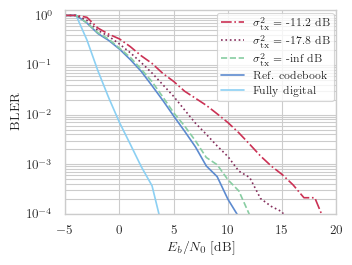

In [3]:
print("Simulation duration: {:1.2f} [h]".format(DL_SIMS["duration"]/3600))

tx_devs = DL_SIMS["codebook_dev"]
cb_si = DL_SIMS["codebook_si"]

fig, ax = plt.subplots()

ax.set_xlabel(r"$E_b/N_0$ [dB]")
ax.set_ylabel("BLER")
ax.grid(which="both")

bit_per_symbol = 2 

legend = [r"Fully digital",
          r"Ref. codebook",
          r"$\sigma_{\mathrm{tx}}^2=$ "+ f"{tx_devs[1]:.1f} dB",
          r"$\sigma_{\mathrm{tx}}^2=$ "+ f"{tx_devs[2]:.1f} dB",
          r"$\sigma_{\mathrm{tx}}^2=$ "+ f"{tx_devs[3]:.1f} dB"]

xmin = -5 # min(DL_SIMS["ebno_db"])
xmax = 20
ymin = 1e-4
ymax = 1.3

for i, ber in enumerate(DL_SIMS["bler"]):
    if i == 0:
        ax.semilogy(DL_SIMS["ebno_db"], ber, c=viz.c)
        ax.set_prop_cycle(None)
    else:
        ax.semilogy(DL_SIMS["ebno_db"], ber)

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

fontsize = 8.0
ax.legend(legend,
          borderaxespad=0.25, title_fontsize=fontsize, fontsize=fontsize,
          alignment="right", reverse=True)
ax.grid()
anlg_sims = DL_SIMS

plt.savefig(plot_path/f"{fname}.pgf", bbox_inches="tight")
plt.savefig(plot_path/f"{fname}.pdf", bbox_inches="tight")

## Hybrid MU-MIMO
$L=K=4$ beams, 2 users

In [4]:
fname = "bler_hybrid"
with open(res_path/f"{fname}.json", 'r', encoding ='utf8') as json_file:
    DL_SIMS = json.load(json_file)

Simulation duration: 1.86 [h]


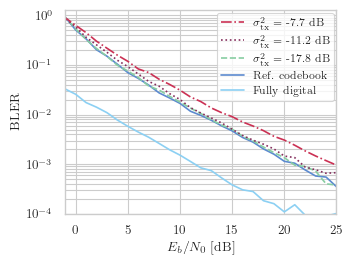

In [5]:
print("Simulation duration: {:1.2f} [h]".format(DL_SIMS["duration"]/3600))

tx_devs = DL_SIMS["codebook_dev"]
cb_si = DL_SIMS["codebook_si"]

fig, ax = plt.subplots()

ax.set_xlabel(r"$E_b/N_0$ [dB]")
ax.set_ylabel("BLER")
ax.grid(which="both")

bit_per_symbol = 2 

legend = [r"Fully digital",
          r"Ref. codebook",
          r" $\sigma_{\mathrm{tx}}^2=$ "+ f"{tx_devs[2]:.1f} dB",
          r" $\sigma_{\mathrm{tx}}^2=$ "+ f"{tx_devs[3]:.1f} dB",
          r"$\sigma_{\mathrm{tx}}^2=$ "+ f"{tx_devs[4]:.1f} dB"]

xmin = -1.0 # min(DL_SIMS["ebno_db"])
xmax = 25
ymin = 1e-4
ymax = 1.3

for i, ber in enumerate(DL_SIMS["bler"]):
    if i == 0:
        ax.semilogy(DL_SIMS["ebno_db"], ber, c=viz.c)
        ax.set_prop_cycle(None)
    else:
        ax.semilogy(DL_SIMS["ebno_db"], ber)

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

fontsize = 8.0
ax.legend(legend,
          borderaxespad=0.25, title_fontsize=fontsize, fontsize=fontsize,
          alignment="right", reverse=True)
ax.grid()
mu_sims = DL_SIMS

plt.savefig(plot_path/f"{fname}.pgf", bbox_inches="tight")
plt.savefig(plot_path/f"{fname}.pdf", bbox_inches="tight")

## Merged curves

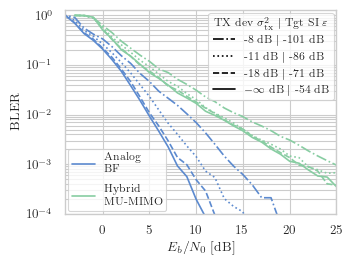

In [6]:
fname="bler"

ber_sims = anlg_sims["bler"][1:] + mu_sims["bler"][1:]
ebno_db = [anlg_sims["ebno_db"], mu_sims["ebno_db"]]

tx_devs = anlg_sims["codebook_dev"]
cb_si = anlg_sims["codebook_si"]

fig, ax = plt.subplots()

ax.set_xlabel(r"$E_b/N_0$ [dB]")
ax.set_ylabel("BLER")
ax.grid(which="both")

bit_per_symbol = 2 

legend = [r"$-\infty$ dB $|$ " + f"{cb_si[1]:.0f} dB",
          f"{tx_devs[2]:.0f} dB $|$ " + f"{cb_si[2]:.0f} dB",
          f"{tx_devs[3]:.0f} dB $|$ " + f"{cb_si[3]:.0f} dB",
          f"{tx_devs[4]:.0f} dB $|$ " + f"{cb_si[4]:.0f} dB",]

xmin = -4.0
xmax = 25
ymin = 1e-4
ymax = 1.3

ncurves = 4
lines = []
for i, ber in enumerate(ber_sims):
    ebno_vals = ebno_db[i//ncurves]
    color = viz.b if i//ncurves == 0 else viz.g
    if i % ncurves == 0:
        ax.set_prop_cycle(None)
    ln, = ax.semilogy(ebno_vals, ber, c=color)
    lines.append(ln)

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

fontsize = 8.0
lgd = ax.legend(legend, title=r"TX dev $\sigma_{\mathrm{tx}}^2$ $|$ Tgt SI $\varepsilon$",
          borderaxespad=0.25, title_fontsize=fontsize, fontsize=fontsize, #title=r"TX deviation $\sigma_{\mathrm{tx}}^2$",
          alignment="center", reverse=True, ncol=1, loc="upper right", columnspacing=0.8)
[lh.set_color('black') for lh in lgd.legend_handles]
ax.add_artist(lgd)
lgd2 = ax.legend(labels=["Analog\nBF", "Hybrid\nMU-MIMO"], handles=[lines[0], lines[ncurves]],
                 borderaxespad=0.25, title_fontsize=fontsize, fontsize=fontsize, labelspacing=1,
                 alignment="center", ncol=1, loc="lower left")

ax.grid()

plt.savefig(plot_path/f"{fname}.pgf", bbox_inches="tight")
plt.savefig(plot_path/f"{fname}.pdf", bbox_inches="tight")

## Beam comparison

$L=K\in\lbrace 2,4,6\rbrace$ beams, 2 users


In [7]:
fname = "bler_beam_comp"
with open(res_path/f"{fname}.json", 'r', encoding ='utf8') as json_file:
    DL_SIMS = json.load(json_file)

Simulation duration: 0.79 [h]


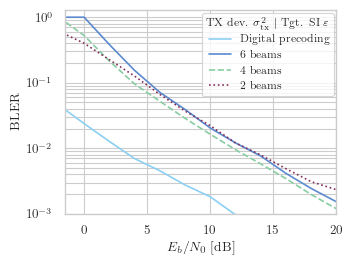

In [8]:
print("Simulation duration: {:1.2f} [h]".format(DL_SIMS["duration"]/3600))

tx_devs = DL_SIMS["codebook_dev"]
cb_si = DL_SIMS["codebook_si"]
n_beams = DL_SIMS["num_beams"]

fig, ax = plt.subplots()

ax.set_xlabel(r"$E_b/N_0$ [dB]")
ax.set_ylabel("BLER")
ax.grid(which="both")

bit_per_symbol = 2 

legend = [r"Digital precoding",
          f"{n_beams[1]} beams",
          f"{n_beams[2]} beams",
          f"{n_beams[3]} beams"]

xmin = -1.5 # min(DL_SIMS["ebno_db"])
xmax = 20
ymin = 1e-3
ymax = 1.3

for i, ber in enumerate(DL_SIMS["bler"]):
    if i == 0:
        ax.semilogy(DL_SIMS["ebno_db"], ber, c=viz.c)
        ax.set_prop_cycle(None)
    else:
        ax.semilogy(DL_SIMS["ebno_db"], ber)

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

fontsize = 8.0
ax.legend(legend, title=r"TX dev. $\sigma_{\mathrm{tx}}^2$ $|$ Tgt. SI $\varepsilon$",
          borderaxespad=0.25, title_fontsize=fontsize, fontsize=fontsize,
          alignment="right")
ax.grid()

plt.savefig(plot_path/f"{fname}.pgf", bbox_inches="tight")
plt.savefig(plot_path/f"{fname}.pdf", bbox_inches="tight")